In [1]:
#Importamos las librerias necesarias
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import Modulo_SVM

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
#Cargamos el data set
data = pd.read_csv('C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/Jaime/TFG/HuGaDB-master/HuGaDB_v2_Digest/DataFrameFinal.csv')

#Elimino las filas con algún valor de columna vacio 
data = data.dropna()

In [3]:
# Hyperparametros
nTest = 0.2
nSamples = 75000
nTrain = 1-nTest
nSamples =  round(nSamples / nTrain)
num_splits = 10
# kernels = ['poly','rbf','sigmoid', 'linear']
kernels = ['poly','rbf']

In [4]:
df = data
df = df[:nSamples]

In [5]:
# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 9) | (df.act == 12)]

In [6]:
X = df.drop(['act'], axis = 'columns')
y = df.act

num of samples: 75000
[20748, 4345, 8870, 7723, 5538, 1247, 1355, 14702, 0, 5919, 4553, 0]


<BarContainer object of 12 artists>

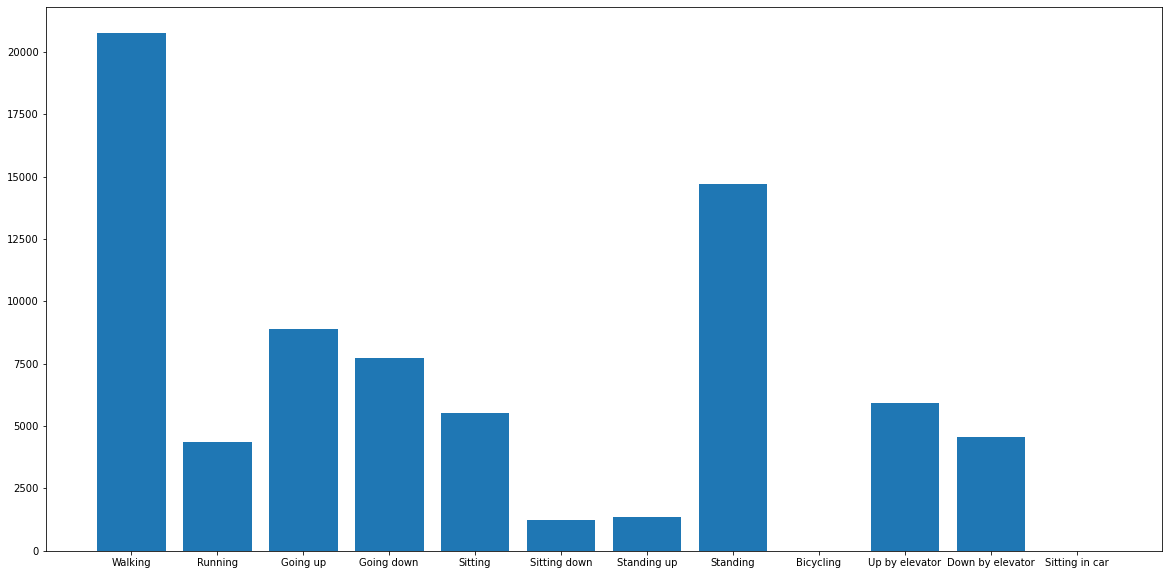

In [7]:
x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
               'Bicycling', 'Up by elevator',  'Down by elevator',  'Sitting in car']
# x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
#             'Up by elevator',  'Down by elevator']
y_values = []
y_values.append((df[(df.act == 1)]).shape[0])
y_values.append((df[(df.act == 2)]).shape[0])
y_values.append((df[(df.act == 3)]).shape[0])
y_values.append((df[(df.act == 4)]).shape[0])
y_values.append((df[(df.act == 5)]).shape[0])
y_values.append((df[(df.act == 6)]).shape[0])
y_values.append((df[(df.act == 7)]).shape[0])
y_values.append((df[(df.act == 8)]).shape[0])
y_values.append((df[(df.act == 9)]).shape[0])
y_values.append((df[(df.act == 10)]).shape[0])
y_values.append((df[(df.act == 11)]).shape[0])
y_values.append((df[(df.act == 12)]).shape[0])
print(f'num of samples: {sum(y_values)}')
print(y_values)
plt.figure(figsize=(20,10))
plt.bar(x_values, y_values, width=0.8)            

In [8]:
# Modelo que entrenaremos 
# model = SVC(C=0.5,kernel = 'poly', degree=3, gamma='scale', coef0= 4, decision_function_shape='ovo'
#             ,shrinking=True, probability=True, verbose = True, random_state=42)
# model = SVC(kernel = 'poly', decision_function_shape='ovo')

In [9]:
#Metodo para graficar tiempos vs muestras de kernel poly 
list_samples_poly = [0,1]
list_times_poly = [0,0]
for sampl in range(6250, nSamples+1, 6250):
    show_samples = int(sampl * (1-nTest))
    print('\033[5;34m'+'Número de muestras:', show_samples, '// kernel: poly','\033[0;m')   
    
    df = data
    df = df[:sampl]
        
    X = df.drop(['act'], axis = 'columns')
    y = df.act
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=nTest, random_state=42)
        
    list_acc, time, best_model = Modulo_SVM.modl(SVC(kernel = 'poly', decision_function_shape='ovo'), X_train, y_train, 10)
        
    mean_acc = np.mean(list_acc)
    list_samples_poly.append(show_samples)
    list_times_poly.append(time)
    
   # print(f'Lista de muestras {list_samples_poly} y lista de tiempos {list_samples_poly}')
        
    print('\033[5;32m'+'Accuracy medio --> ', mean_acc, '\n'+'\033[0;m')



Número de muestras: 5000 // kernel: poly 
Accuracy test en split 1 --> 0.75
Accuracy test en split 2 --> 0.706
Accuracy test en split 3 --> 0.756
Accuracy test en split 4 --> 0.756
Accuracy test en split 5 --> 0.754
Accuracy test en split 6 --> 0.752
Accuracy test en split 7 --> 0.742
Accuracy test en split 8 --> 0.756
Accuracy test en split 9 --> 0.726
Accuracy test en split 10 --> 0.756
Time: 15.5s
Accuracy medio -->  0.7454 

Número de muestras: 10000 // kernel: poly 
Accuracy test en split 1 --> 0.775
Accuracy test en split 2 --> 0.765
Accuracy test en split 3 --> 0.767
Accuracy test en split 4 --> 0.774
Accuracy test en split 5 --> 0.765
Accuracy test en split 6 --> 0.761
Accuracy test en split 7 --> 0.768
Accuracy test en split 8 --> 0.774
Accuracy test en split 9 --> 0.775
Accuracy test en split 10 --> 0.767
Time: 50.953125s
Accuracy medio -->  0.7691000000000001 

Número de muestras: 15000 // kernel: poly 
Accuracy test en split 1 --> 0.7793333333333333
Accuracy test en split 2

In [10]:
print(f'Lista de muestras {list_samples_poly} y lista de tiempos {list_times_poly}')

Lista de muestras [0, 1, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000] y lista de tiempos [0, 0, 15.5, 50.953125, 101.0, 168.453125, 241.75, 348.578125, 471.5625, 606.921875, 750.796875, 951.25, 1183.875, 1538.96875]


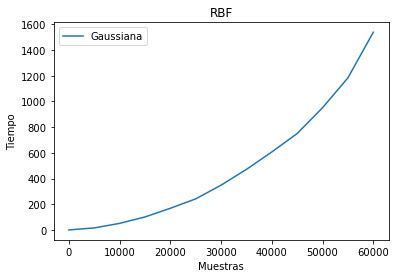

In [11]:
x_poly = list_samples_poly
y_poly = list_times_poly
# x_rbf = list_samples_rbf
# y_rbf = list_times_rbf
# #Generamos una grafica lineal para una recta en X
# plt.plot(x_poly, y_poly, label='Polinomial')
#Generamos otra grafica lineal para una X cuadratica
plt.plot(x_poly, y_poly, label='Gaussiana')

#Agregamos las etiquetas y añadimos una leyenda.
plt.xlabel('Muestras')
plt.ylabel('Tiempo')
plt.title("RBF")
plt.legend()
plt.savefig('grafica_lineal.png')
plt.show()

In [12]:
#Metodo para graficar tiempos vs muestras de kernel rbf
list_samples_rbf = [0,1]
list_times_rbf = [0,0]
for sampl in range(6250, nSamples+1, 6250):
    show_samples = int(sampl * (1-nTest))
    print('\033[5;34m'+'Número de muestras:', show_samples, '// kernel: rbf','\033[0;m')
        
    df = data
    df = df[:sampl]
        
    X = df.drop(['act'], axis = 'columns')
    y = df.act
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=nTest, random_state=42)
        
    list_acc, time, best_model = Modulo_SVM.modl(SVC(kernel = 'rbf', decision_function_shape='ovo'), X_train, y_train, 10)
        
    mean_acc = np.mean(list_acc)
    list_samples_rbf.append(show_samples)
    list_times_rbf.append(time)
    
#     print(f'Lista de muestras {list_samples_rbf} y lista de tiempos {list_samples_rbf}')
        
    print('\033[5;32m'+'Accuracy medio --> ', mean_acc, '\n'+'\033[0;m')

Número de muestras: 5000 // kernel: rbf 
Accuracy test en split 1 --> 0.734
Accuracy test en split 2 --> 0.708
Accuracy test en split 3 --> 0.754
Accuracy test en split 4 --> 0.75
Accuracy test en split 5 --> 0.738
Accuracy test en split 6 --> 0.736
Accuracy test en split 7 --> 0.742
Accuracy test en split 8 --> 0.746
Accuracy test en split 9 --> 0.724
Accuracy test en split 10 --> 0.754
Time: 8.203125s
Accuracy medio -->  0.7385999999999999 

Número de muestras: 10000 // kernel: rbf 
Accuracy test en split 1 --> 0.764
Accuracy test en split 2 --> 0.756
Accuracy test en split 3 --> 0.766
Accuracy test en split 4 --> 0.768
Accuracy test en split 5 --> 0.768
Accuracy test en split 6 --> 0.743
Accuracy test en split 7 --> 0.754
Accuracy test en split 8 --> 0.759
Accuracy test en split 9 --> 0.763
Accuracy test en split 10 --> 0.759
Time: 27.53125s
Accuracy medio -->  0.76 

Número de muestras: 15000 // kernel: rbf 
Accuracy test en split 1 --> 0.7806666666666666
Accuracy test en split 2 -

In [13]:
print(f'Lista de muestras {list_samples_rbf} y lista de tiempos {list_samples_rbf}')

Lista de muestras [0, 1, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000] y lista de tiempos [0, 1, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000]


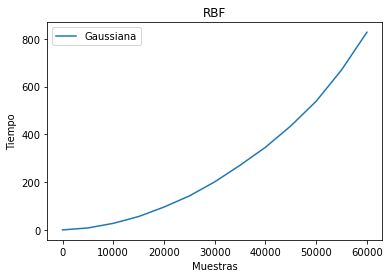

In [14]:
# x_poly = list_samples_poly
# y_poly = list_times_poly
x_rbf = list_samples_rbf
y_rbf = list_times_rbf
# #Generamos una grafica lineal para una recta en X
# plt.plot(x_poly, y_poly, label='Polinomial')
#Generamos otra grafica lineal para una X cuadratica
plt.plot(x_rbf, y_rbf, label='Gaussiana')

#Agregamos las etiquetas y añadimos una leyenda.
plt.xlabel('Muestras')
plt.ylabel('Tiempo')
plt.title("RBF")
plt.legend()
plt.savefig('grafica_lineal.png')
plt.show()

In [15]:
# x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
#                'Bicycling', 'Up by elevator',  'Down by elevator',  'Sitting in car']
# # x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
# #             'Up by elevator',  'Down by elevator']
# y_values = []
# y_values.append((df[(df.act == 1)]).shape[0])
# y_values.append((df[(df.act == 2)]).shape[0])
# y_values.append((df[(df.act == 3)]).shape[0])
# y_values.append((df[(df.act == 4)]).shape[0])
# y_values.append((df[(df.act == 5)]).shape[0])
# y_values.append((df[(df.act == 6)]).shape[0])
# y_values.append((df[(df.act == 7)]).shape[0])
# y_values.append((df[(df.act == 8)]).shape[0])
# y_values.append((df[(df.act == 9)]).shape[0])
# y_values.append((df[(df.act == 10)]).shape[0])
# y_values.append((df[(df.act == 11)]).shape[0])
# y_values.append((df[(df.act == 12)]).shape[0])
# print(f'num of samples: {sum(y_values)}')
# print(y_values)
# plt.figure(figsize=(20,10))
# plt.bar(x_values, y_values, width=0.8)    

In [16]:

# print(f'Lista de muestras {list_samples_poly} y lista de tiempos {list_times_poly}')
# x_poly = list_samples_poly
# y_poly = list_times_poly
# #Generamos una grafica lineal para una recta en X
# plt.plot(x_poly, y_poly, label='Polinomial')

# #Agregamos las etiquetas y añadimos una leyenda.
# plt.xlabel('Muestras')
# plt.ylabel('Tiempo')
# plt.title("Simple Plot")
# plt.legend()
# plt.savefig('grafica_lineal.png')
# plt.show()        

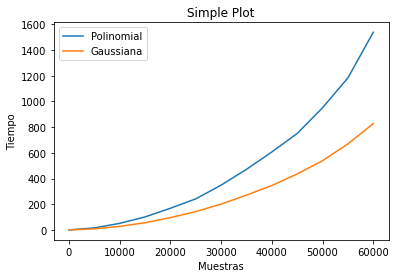

In [17]:
# list_samples_poly = [0, 1, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000]
# list_times_poly = [0, 0, 39718750000, 135718750000, 265937500000, 345343750000, 277421875000, 394828125000, 481390625000, 588859375000, 739046875000, 926046875000, 1129531250000, 1412500000000, 1758062500000, 2197656250000, 2607500000000, 3781156250000, 7050062500000]
x_poly = list_samples_poly
y_poly = list_times_poly
x_rbf = list_samples_rbf
y_rbf = list_times_rbf
#Generamos una grafica lineal para una recta en X
plt.plot(x_poly, y_poly, label='Polinomial')
#Generamos otra grafica lineal para una X cuadratica
plt.plot(x_rbf, y_rbf, label='Gaussiana')

#Agregamos las etiquetas y añadimos una leyenda.
plt.xlabel('Muestras')
plt.ylabel('Tiempo')
plt.title("Simple Plot")
plt.legend()
plt.savefig('grafica_lineal.png')
plt.show()